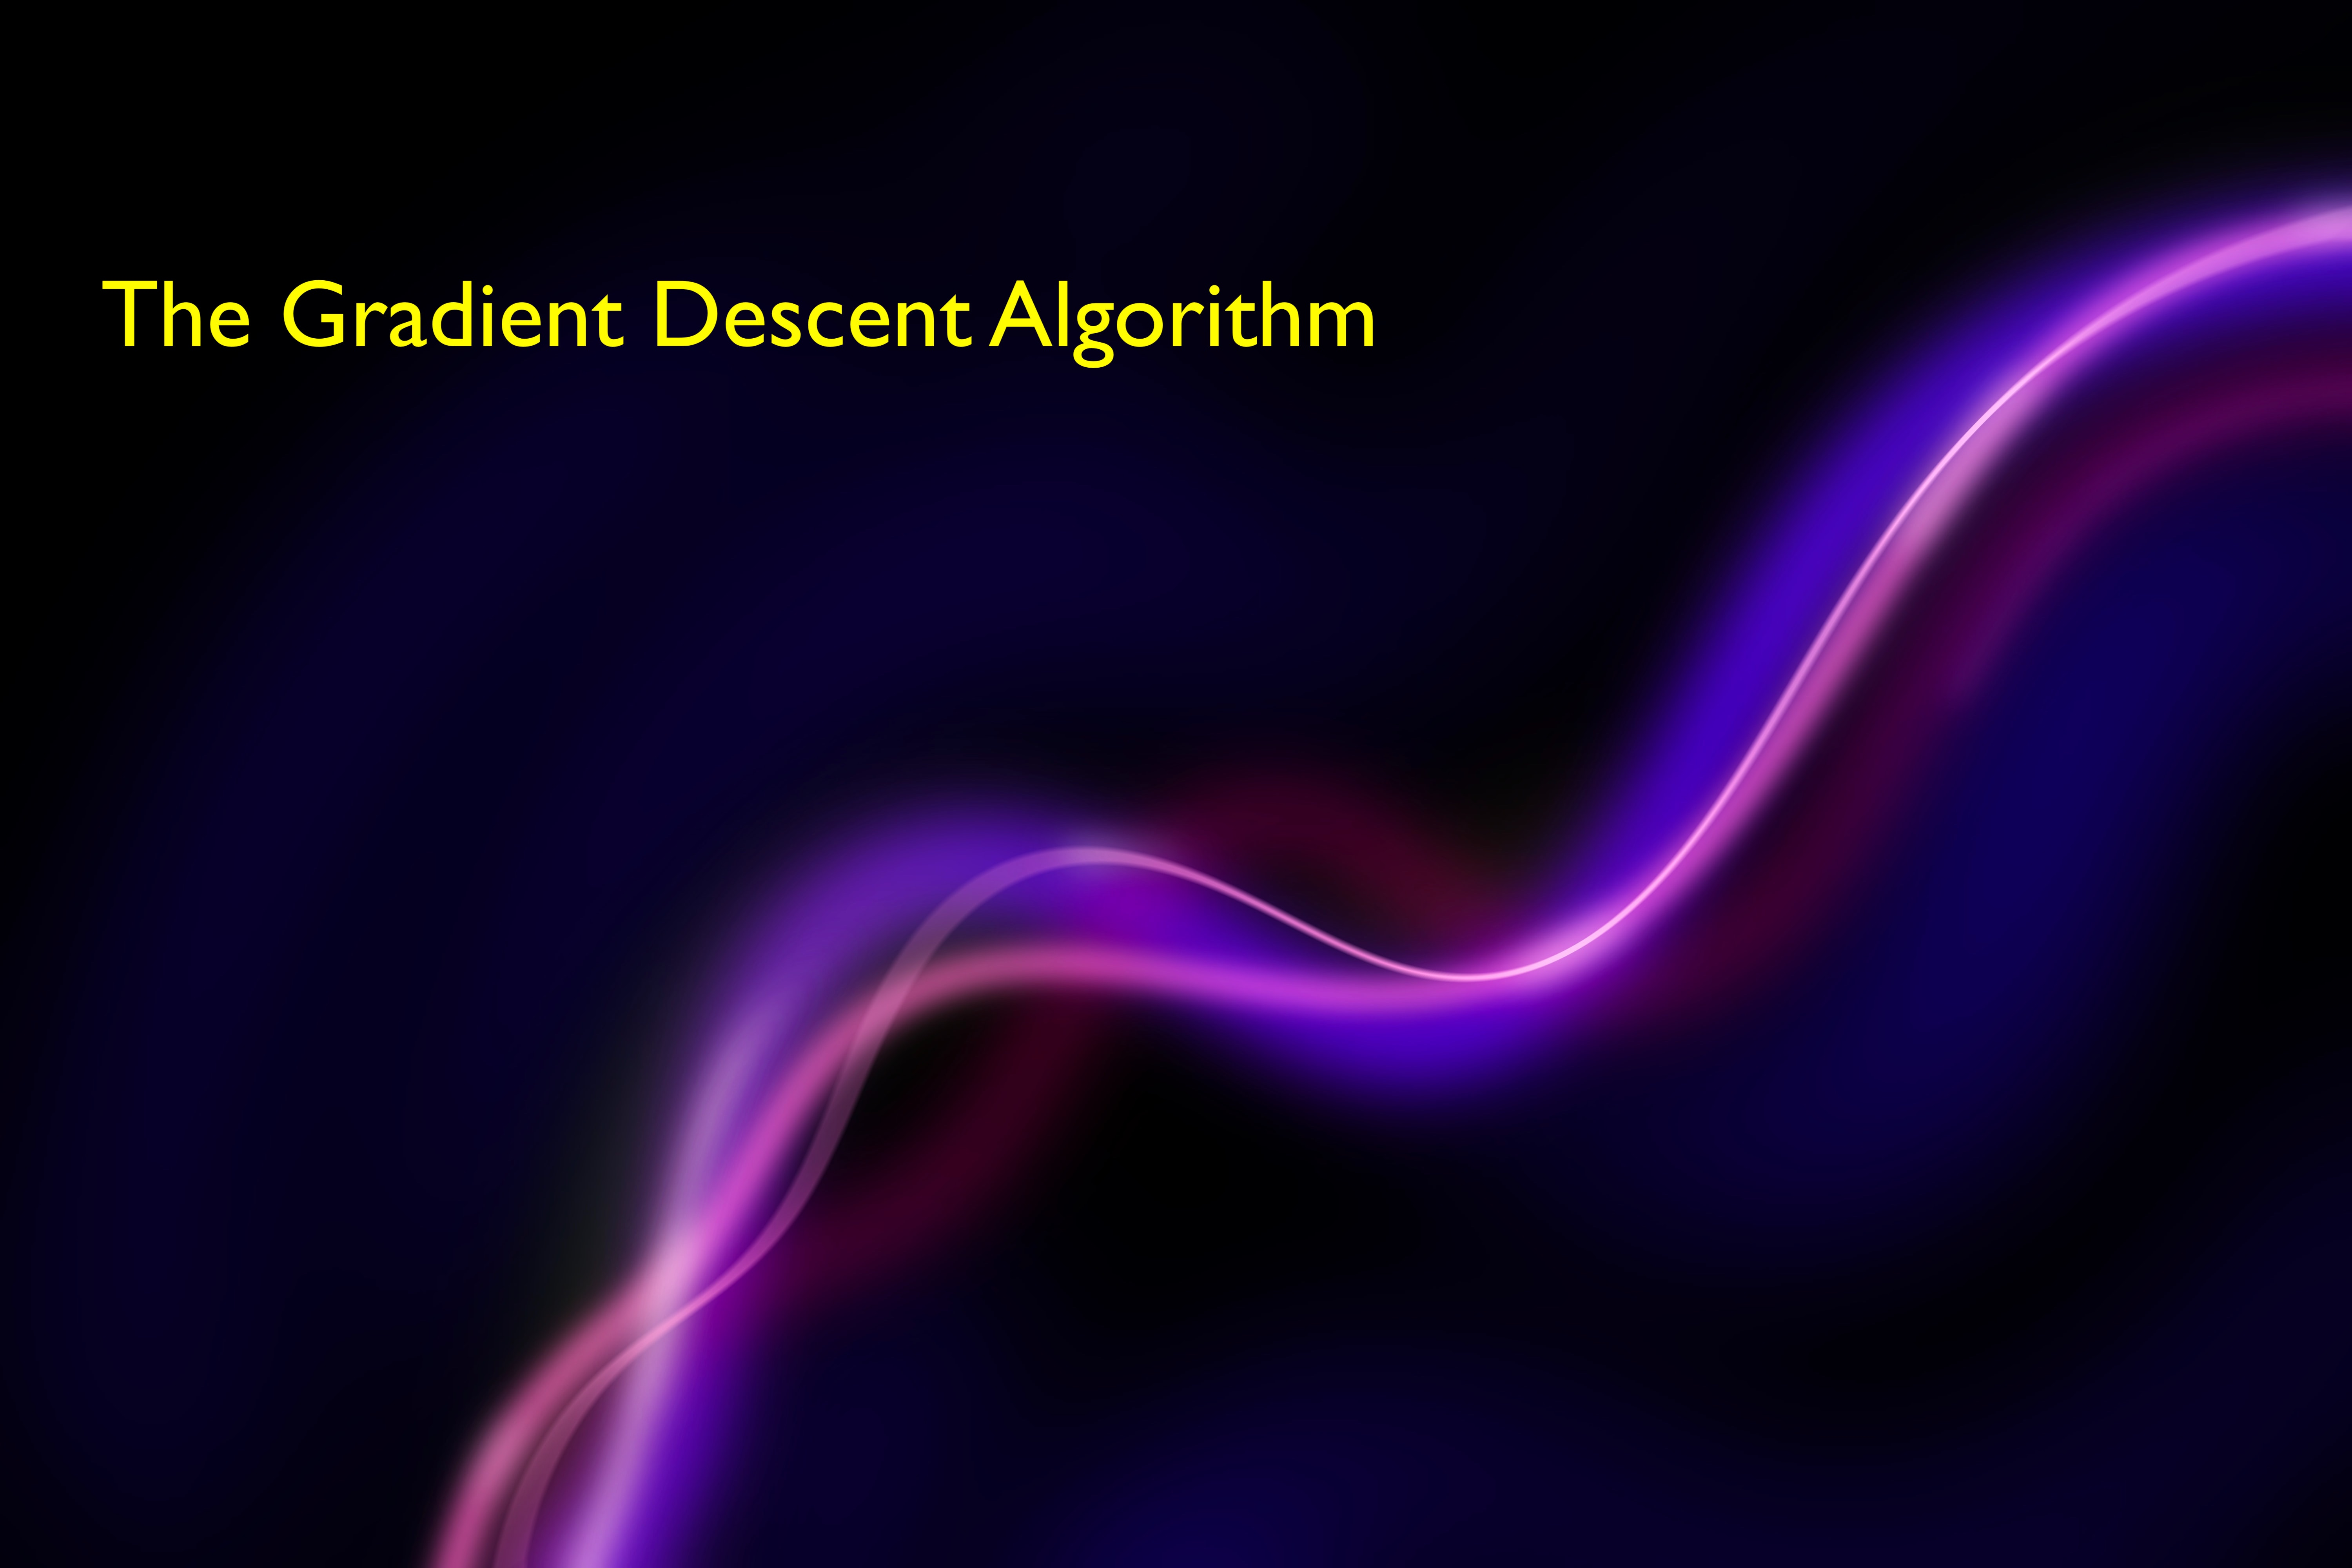

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Acknowledgements" data-toc-modified-id="Acknowledgements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Acknowledgements</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>References</a></span></li></ul></li><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#What-is-a-gradient?" data-toc-modified-id="What-is-a-gradient?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>What is a gradient?</a></span></li><li><span><a href="#The-gradient-descent" data-toc-modified-id="The-gradient-descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The gradient descent</a></span></li><li><span><a href="#A-linear-model-example" data-toc-modified-id="A-linear-model-example-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A linear model example</a></span><ul class="toc-item"><li><span><a href="#Definion-of-Loss-function" data-toc-modified-id="Definion-of-Loss-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Definion of Loss function</a></span></li></ul></li><li><span><a href="#The-gradient-descent-algorithm" data-toc-modified-id="The-gradient-descent-algorithm-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The gradient descent algorithm</a></span><ul class="toc-item"><li><span><a href="#Multivariate-function" data-toc-modified-id="Multivariate-function-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Multivariate function</a></span></li></ul></li><li><span><a href="#Gradient-descent-applied-to-linear-regression" data-toc-modified-id="Gradient-descent-applied-to-linear-regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Gradient descent applied to linear regression</a></span></li><li><span><a href="#Multivariate-Linear-regression-in-PyTorch" data-toc-modified-id="Multivariate-Linear-regression-in-PyTorch-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multivariate Linear regression in PyTorch</a></span></li></ul></div>

## Summary

We describe the Gradient Descent Algorithm (GDA), implement it from scratch, and apply it to solve a multivariate linear model using PyTorch.

### Acknowledgements

Photo by [Milad Fakurian](https://unsplash.com/@fakurian?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com)


### References
1. Deep learning with PyTorch (by Eli Stevens, Luca Antiga, and Thomas Viehmann, published by Manning Publications). Access it online [here](https://www.manning.com/books/deep-learning-with-pytorch)
2. [Description of the Gradient Descent Algorithm](https://realpython.com/gradient-descent-algorithm-python/)
3. [A deep dive to gradient descent algorithm](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f2) 
4. [Linear Regression and Gradient Descent in PyTorch](https://www.analyticsvidhya.com/blog/2021/08/linear-regression-and-gradient-descent-in-pytorch/)
5. [A kaggle notebook on linear regression with PyTorch](https://www.kaggle.com/code/aakashns/pytorch-basics-linear-regression-from-scratch/notebook)

## Load libraries

We use NumPy, Matplotlib and PyTorch.

In [1]:
import matplotlib.pyplot as plt

#plt.style.use('https://raw.githubusercontent.com/JoseGuzman/minibrain/master/minibrain/paper.mplstyle') # minibrain plotting
import numpy as np

# PyTorch
import torch
from torch.utils.data import TensorDataset # input/output DatasetsWe as tuples.
from torch.utils.data import DataLoader # to create random batches
import torch.nn as nn # neural network class

from tqdm import tqdm # progress bar


ModuleNotFoundError: No module named 'torch'

In [ ]:
# visualization configuration 

np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)

In [ ]:
from myrandom import set_seed # utility script
set_seed(42)

In [ ]:
torch.cuda.is_available() # is CUDA available?

## What is a gradient?
For a univariate function (i.e., a function containing only one independent variable), the gradient is the function's first derivative with respect to the independent variable at one variable value. The derivative is interpreted as the **direction and rate** of a function at one point. Thus, intuitively, the derivative is the slope of a function at a given point.


$$ 
\nabla f(x) = 
\left[\begin{array}{c}
\dfrac{df}{dx} \\
\end{array}\right]
$$



For a multivariate function, the gradient is a vector of derivatives in each value direction along with the variables. We employ partial derivatives because we are interested only in a change along one direction (or variable) while not caring about the other independent variables. The resulting gradient vector can be interpreted as the **direction and rate of the multivariate function** at a given multidimensional location. Intuitively, the gradient is the slope of a curve at a given point **in a specified direction**.

$$ 
\nabla f(\left.x, y \right) = 
\left[\begin{array}{c}
\dfrac{\partial f}{\partial x} \\
\dfrac{\partial f}{\partial y} \\
\end{array}\right]
$$

Let's assume we have a multivariate function with independent variables $x$ and $y$:

$$
f(x,y) = x^2 + \frac{y^2}{2}
$$

The gradient is defined as:

$$ 
\nabla f(\left.x, y \right)= 
\left[\begin{array}{c}
\dfrac{\partial f}{\partial x} \\
\dfrac{\partial f}{\partial y} \\
\end{array}\right]
= 
\left[\begin{array}{c}
2x \\
y \\
\end{array}\right]
$$

The gradient specifies that the change on the x-variable is twice along the y-variable. We now calculate the gradient at a point (10,10):

$$
\nabla f(10,10) = 
\left[\begin{array}{c}
20 \\
10 \\
\end{array}\right]
$$

At  (10,10), the gradient is positive and higher in the first dimension. In other words, at that point, the gradient tells us that the function has the steepest step in the x-direction and is two times larger than in the y-direction. So concretely is 20 and 10 for the location (10,10).


Let's define two tensors for the independent variables.

In [ ]:
# Let now x and y be two indepedent variables that we define as tensors and assign them a value
x = torch.tensor([10], dtype= torch.float64, requires_grad=True) 
y = torch.tensor([10], dtype= torch.float64, requires_grad=True)

We define $f(x,y) = x^2 + y^2/2$ with independent variables $x$ and $y$. It will return a tensor.

In [ ]:
# And and the dependent variable (or function )
f = x**2 + y**2/2 # will return a tensor

* Because $f$ was created as a result of an operation of tensors, the function will first return the value at the tensor values., it will return the value of the function at $x=10$ and $y=10$. 

* It has also the gradient function accesible as f.grad_fn

Note that our function contains an associated parameter 'grad_fn' that permits us to track the numerical result of the gradients at the point $(10,10)$.

In [ ]:
f 

The tensors containing the independent variables don't have numerical gradients until we call the
backward() method in the function.

In [ ]:
x.grad, y.grad 

In [ ]:
f.backward() # compute partial derivatives of the function for every independent variable 

In [ ]:
x # the function at value x (x=10)

In [ ]:
x.grad # the value of the gradient at value x (x=10)

In [ ]:
y # similarly, the value of y (y=10)

In [ ]:
y.grad # with a different gradient

In [ ]:
x.grad, y.grad # the variables now incoroporate their gradients

## The gradient descent

We use derivatives (or gradients) to calculate which values of the independent variable/s encounter a maxima, minimum, or a saddle point. The Gradient Descent Algorithm (GDA) is widely used in Machine Learning and Deep Learning applications to find the minimum in the function that describes the difference between real and expected values (cost or loss function). 

GDA uses derivatives (or gradients) iteratively to find a local minimum of the function. Note that the Gradient descent algorithm WILL NOT work for all functions. They must be 

1. **Differentiable**: the function contains a derivative at all its points.
2. **Convex** if a line segment connecting two of their points is above its curve (for a univariate function). Numerically, we can calculate it if the second derivative of the function is > 0.

See examples bellow

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
fig.tight_layout()

x = np.linspace(-2,2,100)
f = lambda x: 20*x**2 
f2 = lambda x: 4*x**3 -10*x +10
ax[0].plot(x, f(x), label='convex');
ax[1].plot(x, f2(x), label='non-convex');

for myax in ax:
    myax.legend(loc=4)
    myax.set_ylim(-10,20)
    myax.axis('off')
    myax.legend(frameon=False)

## A linear model example
We will start with a function with only one independent variable, $x$), which is linearly related to the dependent variable ($y$). The dependency relies on parameters $b$ (bias, an additive constant) and $w$ (weight, a linear scaler) that we want to find. 

$ y_i = b + w\cdot x_i$

We have only a series of $x_i$ and $y_i$ values that we know ($i$ is the number of observations), and we would like to obtain expected results of the dependent variable $\hat{y_i}$ when introducing new observations of the independent variable. Therefore, we will estimate the $b$ and $w$ parameters that minimize the difference between the predicted output (it changes when we try different $m$ and $b$ values) and the actual output ($y_i$). 

### Definion of Loss function


We want to obtain a numerical estimation of our cost. Linear regression uses the ordinary least squares method. In the ordinary least squares (OLS) method, we take the squared difference between the actual outputs ($y_i$) and predicted outputs ($\hat{y_i}$) and square it. Then, if we divide the Sum of Squared Differences (or Residuals, SSR) by the total number of samples, we obtain the mean of squared differences (or errors) or MSE.


$$
MSE = \frac{SSR}{n} = \frac{\sum(y_i -\hat{y_i})^2}{n}
$$

Sometimes we can see this cost function as follows 

$$
C = \frac{SSR}{2n}
$$ 

which is mathematically more convenient than SSR or MSE when computing derivatives.

In [ ]:
# Data from Deep learning with PyTorch
x = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
y = torch.tensor([0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0])

m, a = np.polyfit(x,y,1)
f = np.poly1d([m, a])


plt.scatter(x,y, color='C0', s=40)

xfit = np.linspace(start = x.min(), stop = x.max(),num = 200 )
plt.plot(xfit, f(xfit), color='C0', alpha=0.2, label=f' y = {m:2.2f}*x {a:+2.2f}')

plt.xlabel('x', fontsize=16), plt.ylabel('y', rotation=0, fontsize=16)
plt.xlim(0,100);
plt.legend(frameon=False, loc=4, fontsize=14);

In [ ]:
m, a = np.polyfit(x,y,1)
print(f'intercept ={a:2.2f} and slope = {m:2.2f}')

In [ ]:
def linear_model(b:float, w:float, x:torch.tensor)->torch.tensor:
    """
    Returns linear predictions of the form:
    
    f(b,w)= b + w*x,
        
    where x are our independent
    observations , b is bias (aditive constant)
    and w is the weight (the linear scaler).

    Note that is x is a torch tensor previously defined
    
    """
    return b + w*x

In [ ]:
# we try one xample of weight= 5 and bias = 1.4
myparams = dict(b = 1.4, w = 5.0, x=0)
y_pred = linear_model(**myparams)
y_pred # must be b

In [ ]:
plt.scatter(x, y, color='C0', s=20, label='$y$ is real outcome') # 
plt.scatter(x, linear_model(b=1.4, w=0.5, x=x), color='orange', label='$\hat{y}$ is predicted outcome')
plt.legend(loc=4, fontsize=16);
plt.xlabel('x', fontsize=16), plt.ylabel('y', rotation=0, fontsize=16)
plt.xlim(0,100);
plt.legend(frameon=False, loc=0);

In [ ]:
# define loss function
def mse(y_pred:torch.tensor, y:torch.tensor)->torch.tensor:
    """
    Computes the mean of the squared differences
    between predicted (y_pred) and outcomes (y)
    """
    squared_diff = (y_pred - y)**2
    return squared_diff.mean()
    

In [ ]:
# Let's try with weight = 5 and bias 1.4
y_pred = linear_model(b = 1.4, w = 5.0, x =x)
mse(y_pred = y_pred, y =y)

In [ ]:
# Let's try with weight = 10 and bias 1.4
y_pred = linear_model(b = 1.4, w = 10.0, x=x)
mse(y_pred = y_pred, y =y)

In [ ]:
# other parameters
y_pred = linear_model(b = 0, w = 1.0, x=x)
mse(y_pred = y_pred, y =y)

## The gradient descent algorithm

The Gradient Descent Algorithm (GDA) calculates iteratively the next value of a function (or the next infinitesimally small point) using the gradient at the current value (or position). Then, it scales that value by a small constant (learning rate) and subtracts the scaled value from the current position (makes a backward step). The subtraction is to move in the direction of a minimum. If we look for a maximum, we add the value of the gradient.

$$
x_{i+\eta} = x_i - \eta \nabla C(x_i)
$$

$x_{i+\eta}$ is the value of the function at the next infinitesimal step defined by $\eta$ (learning rate). $\nabla C(x_i)$ the gradient of the cost function at the $x_i$ location. 

The Gradient Descent algorithm consists of:

1. Choose a starting point (initialization). 
2. Calculate the gradient at this point
3. make a scaled step in the opposite direction (negative) to the gradient
4. repeat 2 and 3 until the scaled gradient is very small or a maximum number of iterations is reached.


In [ ]:
def gradient_descent(x_start, cost_func, gradient_func, learn_rate:float, max_iter:int, tol = 0.001):
    """
    Gradient Descent Algorith (GDA) implementation
    
    x_start: initial value of the cost function
    cost_func: cost function to minimize
    gradient_func: gradient of the cost function
    learn_rate: scale factor of the gradient
    max_iter: maximun number of iterations
    tol: tolerance" 
    """
    
    x = cost_func(x_start)
    cost = list()
    
    for _ in tqdm( range(max_iter) ):
        mygrad = gradient_func(x) # calculate gradient at that point
        diff = learn_rate*mygrad  # scaled step (earning rate * rate )
        
        if np.abs(diff)<=tol: # stop if scaled gradient is less than tolerance
            break    
            
        x -= diff
        cost.append(cost_func(x) ) # history tracing

    return cost, x

Let's start with an analytical function 

$$f(x) = x^2 - 4x -1$$

The derivative (gradient in one dimension) is 

$$\frac{df}{dx}= 2x -4$$

To find the minimum we solve $x$ for 

$$\frac{df}{dx}= 0$$

Then we have than when

$$2x - 4= 0$$

Thus, the minimun of the function $f(x)$ is at $x=2$. We can now calculate the value of the function $f(x)$ in its minimun. 

$$f(2) = (2)^2 -4(2) -1 = 5$$


In [ ]:
mycost = lambda x: x**2 - 4*x -1 
mygradient = lambda x: 2*x -4 # df(x)/dx = 2*x -4 


In [ ]:
myparams = dict(cost_func = mycost, gradient_func = mygradient, learn_rate = 0.01, max_iter = 500, tol = 1e-3)
cost, x = gradient_descent(x_start = 50, **myparams)

In [ ]:
plt.plot(cost, 'o', ms=2)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel(' $C(x)$', fontsize=16)
plt.text(250,np.max(cost)/2., f'C(x)={cost[-1]:2.2f}', fontsize=14);

In [ ]:
x # value of the minimun

### Multivariate function 


Let's apply it to a multivariate funcion of the form:

$$
f(x,y) = (x+1)^2 + \frac{y^2}{2}
$$

The gradient is defined as:

$$ 
\nabla f(\left.x, y \right)= 
\left[\begin{array}{c}
\dfrac{\partial f}{\partial x} \\
\dfrac{\partial f}{\partial y} \\
\end{array}\right]
= 
\left[\begin{array}{c}
2(x +1)\\
y \\
\end{array}\right]
$$

whose minima is at $(-1,0)$

In [ ]:
mygradient = lambda p: np.array([2*(p[0]+1), p[1]]) # returns a vector

In [ ]:
p = (10,10) # gradient at p(10,10)
mygradient(p)

In [ ]:
def gradient_descent(x_start, gradient_func, learn_rate, max_iter, tol=1e-6):
    
    steps = [x_start] # start with initial value (starting point)
    x = x_start # note here we don't need to know the value of the function, 
                # just its gradient

    for _ in range(max_iter):
        mygrad = gradient_func(x) # calculate gradient at that point
        diff = learn_rate*mygrad  # scaled step (earning rate * rate )
        
        if np.all(np.abs(diff)<=tol): # stop if scaled step is less than tolerance
            break    
        x = x - diff
        steps.append(x) # history tracing

    return steps, x

In [ ]:
myparams = dict(gradient_func = mygradient, learn_rate = 0.1, max_iter = 100)
steps, val = gradient_descent(x_start = (10,10), **myparams)

In [ ]:
x = [p[0] for p in steps]
y = [p[1] for p in steps]

In [ ]:
plt.plot(x, label='x') 
plt.plot(y, label='y')
plt.xlabel('Steps')
plt.ylabel('Gradients')
plt.yticks(list(range(-2,2)) +[5, 10]);
plt.legend(frameon=False, loc=1);


In [ ]:
np.round(val) # -1 and 0

## Gradient descent applied to linear regression

In [ ]:
# Data from Deep learning with PyTorch

x = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
y = torch.tensor([0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0])

In [ ]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

In [ ]:
def linear_model(b:float, w:float, x:torch.tensor)->torch.tensor:
    """
    Returns linear predictions of the form:
    
    f(b,w)= b + w*x,
        
    where x are our independent
    observations (x), b is bias (aditive constant)
    and w is the weight (the linear scaler).
    
    """
    return b + w*x

In [ ]:
# define loss function
def mse(y_pred:torch.tensor, y:torch.tensor)->torch.tensor:
    """
    Computes the mean of the squared differres
    between predicted (y_pred) and outcomes (y)
    """
    squared_diff = (y_pred - y)**2
    return squared_diff.mean()
    

If we normalize x-values by a constant (e.g., max. value) we need to correct the slope of the fitted curve by it. The normalization process is to have both $w$ and $b$ within the same range for the optimization for the gradient descent. 

In [ ]:
x_norm = x/x.max()


In [ ]:
m, a = np.polyfit(x_norm,y,1)
print(m,a)

In [ ]:
m/x.max()

In [ ]:
plt.scatter(x,y, color='C0', s=40)

m, a = np.polyfit(x_norm,y,1)
m = m/x.max()
f = np.poly1d([m, a])


xfit = np.linspace(start = x.min(), stop = x.max(),num = 200 )
plt.plot(xfit, f(xfit), color='C0', alpha=0.2, label=f' y = {m:2.2f}*x {a:+2.2f}')

plt.xlabel('x', fontsize=16), plt.ylabel('y', rotation=0, fontsize=16)
plt.xlim(0,100);
plt.legend(frameon=False, loc=4, fontsize=14);

In [ ]:
epochs = 1_000
lr = 0.05 # learning rate

myloss = list()
for i in tqdm(range(epochs)):
    
    if w.grad is not None:
        w.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()

    # Generate Prediction
    preds = linear_model(b, w, x_norm)
    # Get the loss and perform backpropagation
    loss = mse(y_pred = preds, y=y)
    loss.backward() # will update gradients
        # Let's update the weights
    with torch.no_grad():
        w -= lr * w.grad 
        b -= lr * b.grad 

    # Set the gradients to zero

    myloss.append(loss.item())
    if i<5 or i%50 ==0:
        print(f'Epoch {i:04d}/{epochs}: Grad_w = {float(w.grad):2.4f}, Grad_b = {float(b.grad):2.4f}, Loss: {loss:2.4f}')
        

Note the gradients for $w$ and $b$ are within the same range.

In [ ]:
plt.plot(myloss)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Loss (MSE)', fontsize=16)
#plt.text(250,np.max(cost)/2., f'C(x)={cost[-1]:2.2f}', fontsize=14);

In [ ]:
w, b

In [ ]:
w/x.max()

In [ ]:
xfit = np.linspace(start = x.max(), stop = x.min(), num = 200)
b = float(b)
w = float(w/x.max())
yfit = b + w*xfit
plt.scatter(x, y)
plt.plot(xfit,yfit, color='brown', label=f' y = {m:2.2f}*x {a:+2.2f}')
plt.xlim(0,100)
plt.xlabel('x', fontsize=16), 
plt.ylabel('y', rotation=0, fontsize=16)
plt.legend(frameon=False, loc=4)

## Multivariate Linear regression in PyTorch

In [ ]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

In [ ]:
# 15 observations and three indepedent variables
inputs.shape

In [ ]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

In [ ]:
# 15 targets and two dependent variables
targets.shape

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

We create a Pytorch's **TensorDataset** to pair both inputs and targets tensors and access them as tuples

In [ ]:
dataset = TensorDataset(inputs, targets)
dataset[:2] # two first observations

We use  Pytorch’s **DataLoader** to convert dataset into batches of predefined batch size and create batches by picking samples from the dataset randomly.

In [ ]:
# we have 5 batches of 3 observations (total 15 observations)
train_loader = DataLoader(dataset, batch_size=3, shuffle = True) # batches containing 3 observations (iterable)

In [ ]:
len(train_loader)

In [ ]:
# run every time a new Batch Sample
for batch_input, batch_target in train_loader:
    print(batch_input)
    print(batch_target)
    break

We should find the optimal weights and biases which is specified in the above equations so that it defines the ideal linear relationship between inputs and outputs

In [ ]:
inputs.shape

$y = w \cdot X + b$

In [ ]:
# generate random initial conditions for the parameters
W = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(W)
print(b)

In [ ]:
def linear_model(X:torch.tensor) -> torch.tensor:
    """
    Solves a multivariate multi-regression model for three
    independent variables and two targets.
    """
    assert X.shape[1] == 3 # only three independent variables
    
    Y_hat =  b + torch.mm(X, W.T) # matrix multiplication (1,3 x 3,2)
    assert Y_hat.shape[1] == 2 # two depedent variables
    
    return Y_hat

In [ ]:
def MSE(prediction:torch.tensor, target:torch.tensor)-> float:
    """
    Mean squared differences between prediction and target tensor
    
    """
    assert prediction.shape == target.shape
    
    diff = target - prediction
    return torch.sum(diff**2)/ diff.numel()

let's predict out for the first batch 

In [ ]:
for X,y in train_loader:
    Y_hat = linear_model(X)
    print(Y_hat)
    print(f'Loss = {MSE(prediction = Y_hat, target = y)}')
    break

Gradient descent

In [ ]:
epochs = 500
lr = 1e-6 # learning rate

myloss = list()
for i in tqdm(range(epochs)):
    
    # Iterate through training dataloader
    for X,Y in train_loader:
        # Generate Prediction
        preds = linear_model(X)
        # Get the loss and perform backpropagation
        loss = MSE(prediction = preds, target=Y)
        loss.backward() # will update gradients
        # Let's update the weights
        with torch.no_grad():
            W -= W.grad * lr
            b -= b.grad * lr
        # Set the gradients to zero
        W.grad.zero_()
        b.grad.zero_()
        myloss.append(loss.item())
    if i<5 or i%50 == 0:
        print(f'Epoch {i:04d}/{epochs}: Loss: {loss:2.4f}')
        

Now that we have optimized w and b, we may have a better approximation 

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
ax.plot(myloss, lw=1)
ax.set_ylabel('Loss');
ax.set_xlabel('epoch');

In [ ]:
W

In [ ]:
b

In [ ]:
for x,y in train_loader:
    preds = linear_model(x)
    print("Prediction is :n",preds)
    print("Targets is :n",y)
    print(f'Loss = {MSE(preds, y)}')
    break

In [ ]:
class LinearRegressionModel(nn.Module):
    """
    Multi-variate, multi-regression model
    """
 
    def __init__(self, in_features, out_features):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(in_features, out_features)  # 3 in and 2 out
 
    def forward(self, x):
        """
        returns the prediction of a linear model
        """
        y_pred = self.linear(x)
        return y_pred

In [ ]:
# define model with three input variables, and two output variables
mymodel = LinearRegressionModel(in_features=3, out_features=2)

In [ ]:
criterion = nn.MSELoss() # loss is Mean squared error

In [ ]:
optimizer = torch.optim.SGD(mymodel.parameters(), lr = 1e-6) # stochastic gradient descent

In [ ]:
epohs = 500
myloss = list()
for i in tqdm(range(epochs)):
     for X,Y in train_loader:
        # Forward pass: Compute predicted y by passing
        # x to the model
        pred_y = mymodel(X) # this is like mymodel.forward(X=X)
 
        # Compute and print loss
        loss = criterion(pred_y, Y)
 
        # Zero gradients, perform a backward pass,
        # and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        myloss.append(loss.item())
        if i<5 or i%100 == 0:
            print(f'Epoch {i:04d}/{epochs}: Loss: {loss:2.4f}')
        
        #print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
ax.plot(myloss, lw=1)
ax.set_ylabel('Loss');
ax.set_xlabel('epoch');

In [ ]:
W.detach().numpy()

In [ ]:
b